In [3]:
# pip install ipython
# pip install pillow
# pip install TA_Lib-0.4.19-cp38-cp38-win_amd64.whl
# pip install xgboost
import numpy as np
import pandas as pd
import graphviz
import matplotlib.pyplot as plt

from IPython.display import Image

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor

from PIL import Image as Image2

import tushare as ts
import datetime
from datetime import datetime as dtime
import mpl_finance as mpf
import seaborn as sns
from matplotlib.pylab import date2num
import talib

from xgboost import XGBClassifier
from xgboost import XGBRegressor

In [ ]:
'''
What is XGBoost?

简答: 和GBDT很像, 只不过GBDT从第二轮开始将 损失函数的一阶导(通常为残差) 作为新标签;
而XGBoost从第二轮开始将 添加了损失函数二阶导和惩罚项的Obj函数 作为新标签.
'''

Image(filename = "xgboost.jpg", width = 500, height = 500)

In [ ]:
Image(filename = "xgboost2.jpg", width = 500, height = 500)

In [ ]:
Image(filename = "xgboost3.jpg", width = 500, height = 500)

In [ ]:
Image(filename = "xgboost4.jpg", width = 500, height = 500)

In [ ]:
Image(filename = "xgboost5.jpg", width = 500, height = 500)

In [12]:
fraud_df = pd.read_excel('信用卡交易数据.xlsx')
fraud_df.head()

,换设备次数,支付失败次数,换IP次数,换IP国次数,交易金额,欺诈标签
0,0,11,3,5,28836,1
1,5,6,1,4,21966,1
2,6,2,0,0,18199,1
3,5,8,2,2,24803,1
4,7,10,5,0,26277,1


In [13]:
X = fraud_df.drop(columns='欺诈标签') 
y = fraud_df['欺诈标签']

X_train, X_test, y_train, y_test\
= train_test_split(X, y, test_size=0.2, random_state=123)

xgb_clf = XGBClassifier(n_estimators=100, learning_rate=0.05)
xgb_clf.fit(X_train, y_train)

y_pred = xgb_clf.predict(X_test)

vec = pd.DataFrame()
vec['预测值'] = list(y_pred)
vec['实际值'] = list(y_test)
vec.head()

[09:45:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\anacon\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


,预测值,实际值
0,0,1
1,1,1
2,1,1
3,0,0
4,0,1


In [14]:
score = accuracy_score(y_pred, y_test)
score

0.875

In [15]:
# XGBClassifier分类器本质预测的并不是准确的0或1的分类,
# 而是预测其属于某一分类的概率，可以通过predict_proba()函数
# 来查看预测属于各个分类的概率

y_pred_proba = xgb_clf.predict_proba(X_test)
print(y_pred_proba[0:5])  # 查看前5个预测的概率

[[0.8265032  0.1734968 ]
 [0.02098632 0.9790137 ]
 [0.0084281  0.9915719 ]
 [0.8999369  0.1000631 ]
 [0.8290514  0.17094862]]


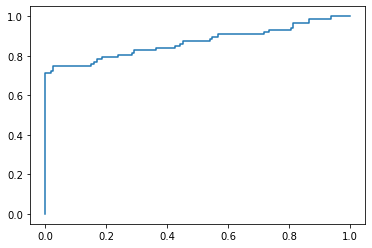

In [16]:
fpr, tpr, thres = roc_curve(y_test, y_pred_proba[:,1])
plt.plot(fpr, tpr)
plt.show()

In [17]:
auc = roc_auc_score(y_test, y_pred_proba[:,1])
auc

0.8684772657918828

In [18]:
#查看训练后模型中的各个参数权重

features = X.columns
importances = xgb_clf.feature_importances_

impt_df = pd.DataFrame()
impt_df['feature'] = features
impt_df['feature_importance'] = importances
impt_df.sort_values('feature_importance', ascending=False)

,feature,feature_importance
0,换设备次数,0.406744
3,换IP国次数,0.333477
1,支付失败次数,0.190185
2,换IP次数,0.041010
4,交易金额,0.028585


In [ ]:
parameters = {'max_depth': [1, 3, 5], 'n_estimators': [50, 100, 150], 'learning_rate': [0.01, 0.05, 0.1, 0.2]}  # 指定模型中参数的范围
xgb_opt = XGBClassifier()  # 构建模型
grid_search = GridSearchCV(xgb_opt, parameters, scoring='roc_auc', cv=5)
grid_search.fit(X_train, y_train)

In [20]:
grid_search.best_params_

{'learning_rate': 0.05, 'max_depth': 1, 'n_estimators': 100}

In [21]:
better_clf = XGBClassifier(max_depth=1, n_estimators=100, learning_rate=0.05)
better_clf.fit(X_train, y_train)
better_proba = better_clf.predict_proba(X_test)
better_auc = roc_auc_score(y_test, better_proba[:,1])
print(better_auc)

[09:46:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.8563218390804598


In [22]:
'''
出现这种情况的原因是因为交叉验证,：它是将原来的测试数据分为K份（这里cv=5，即5份),
然后在这K份数据中，选K-1份作为训练数据，剩下的1份作为测试数据，训练K次,
获得K个的ROC曲线下的AUC值，然后将K个AUC值取平均,取AUC均值为最大情况下的参数为模型的最优参数。

注意这里AUC值的获取是基于训练集数据,
只不过是将训练集数据中的1/K作为测试集数据,
这里的测试集数据并不是真正的测试集数据y_test,
这也是为什么参数调优后结果反而不如不调优的结果的原因。

实际应用中, 出现这种情况某种程度也是因为数据量较小的原因（像本案例为1000条数据）
'''

'\n出现这种情况的原因是因为交叉验证,：它是将原来的测试数据分为K份（这里cv=5，即5份),\n然后在这K份数据中，选K-1份作为训练数据，剩下的1份作为测试数据，训练K次,\n获得K个的ROC曲线下的AUC值，然后将K个AUC值取平均,取AUC均值为最大情况下的参数为模型的最优参数。\n\n注意这里AUC值的获取是基于训练集数据,\n只不过是将训练集数据中的1/K作为测试集数据,\n这里的测试集数据并不是真正的测试集数据y_test,\n这也是为什么参数调优后结果反而不如不调优的结果的原因。\n\n实际应用中, 出现这种情况某种程度也是因为数据量较小的原因（像本案例为1000条数据）\n'